### <center>KNN</center>

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [26]:
data = pd.read_csv('../Data/car_evaluation.csv')
data.columns = ['Buying_price','Maintainance_Price','No_of_doors','Person_Capacity','Size_of_luggage','Safety','Acceptability']
data.head()

,Buying_price,Maintainance_Price,No_of_doors,Person_Capacity,Size_of_luggage,Safety,Acceptability
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [27]:
data.isna().sum()

Buying_price          0
Maintainance_Price    0
No_of_doors           0
Person_Capacity       0
Size_of_luggage       0
Safety                0
Acceptability         0
dtype: int64

In [28]:
#Encoding
X = pd.DataFrame()
encoder = OneHotEncoder()
val = encoder.fit_transform(data[data.drop('Acceptability',axis=1).columns])
X[encoder.get_feature_names_out()] = val.toarray()
cat = data['Acceptability'].unique()
encoder2 = OrdinalEncoder(categories=[cat])
Y = encoder2.fit_transform(data[['Acceptability']])

In [29]:
def KNNModel(X_train,X_test,Y_train,Y_test,k,weight,p):
    KNN = KNeighborsClassifier(n_neighbors=k,weights=weight,p=p)
    KNN.fit(X_train,Y_train)
    return KNN.score(X_test,Y_test)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [31]:
Max_k = int(math.sqrt(len(data)//2))
Best_Score, Best_K=0,0
for i in range(1,Max_k):
    score = KNNModel(x_train, x_test, y_train, y_test,i,'uniform',2)
    if(score > Best_Score):
        Best_Score,Best_K = score,i

In [32]:
print('Max accuracy is {} at K value of {}'.format(round(Best_Score,2),Best_K))

Max accuracy is 0.92 at K value of 12


<br></br>

### Grid CV

In [33]:
KModel = KNeighborsClassifier()
KFold = 5
para = {
    'n_neighbors':[i for i in range(1,Max_k)],
    'weights':['uniform','distance'],
    'p':[1,2]
}

grid = GridSearchCV(estimator=KModel, param_grid=para, cv=KFold)
grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [34]:
Best_score, Best_para = grid.best_score_,grid.best_params_
print('Best Score is ',Best_score)
print('Parameter at best score is ',Best_para)

Best Score is  0.9080494951080416
Parameter at best score is  {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}


<br></br>

### Clustering

In [35]:
from sklearn.cluster import KMeans

In [36]:
#Encoding
X = pd.DataFrame()
encoder = LabelEncoder()
for i in data.select_dtypes(include='object'):
    X[i] = encoder.fit_transform(data[i])
X_temp = X.drop('Acceptability',axis=1)
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_temp)
Real_class = data['Acceptability']

In [37]:
cluster = KMeans(n_clusters=4,random_state=100)
cluster.fit(scaled_X)
Class = cluster.labels_

Text(0.5, 1.005, 'Original Class')

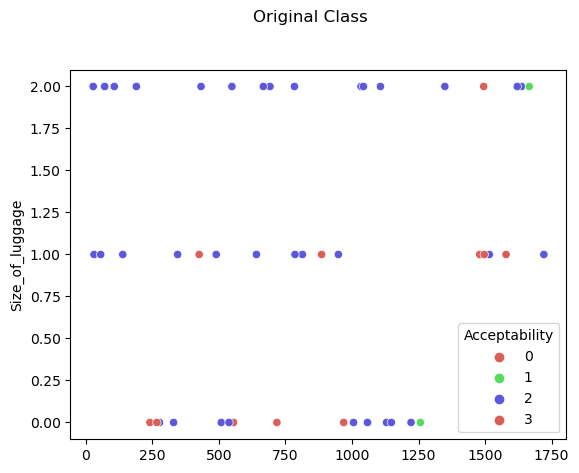

In [38]:
X_main = X.sample(frac=1,random_state=100).head(50)
sns.scatterplot(data=X_main, x=X_main.index,y='Size_of_luggage',hue='Acceptability', palette='hls')
plt.suptitle('Original Class',y=1.005)

Text(0.5, 1.005, '4 Cluster plot')

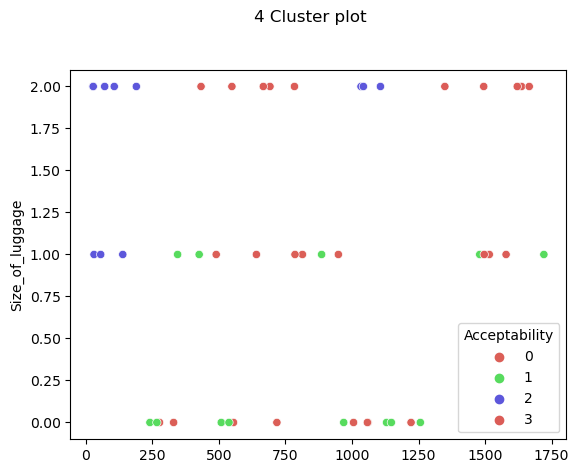

In [39]:
X['Acceptability'] = Class
X_main = X.sample(frac=1,random_state=100).head(50)
sns.scatterplot(data=X_main, x=X_main.index,y='Size_of_luggage',hue='Acceptability', palette='hls')
plt.suptitle('4 Cluster plot',y=1.005)

### WCSS

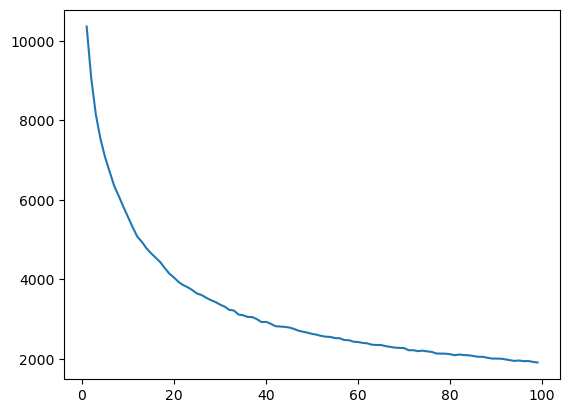

In [40]:
wcss = []
K = 100
for i in range(1,K):
    model = KMeans(n_clusters=i,random_state=100)
    model.fit(scaled_X)
    wcss.append(model.inertia_)

plt.plot([i for i in range(1,K)],wcss)